# TITLE

## Overview
For this project, you will use exploratory data analysis to generate insights for a business stakeholder.

For this project, we ...

## Business Problem
Microsoft is creating a new movie studio to make original video content(movies, tv-shows). Therefore, they want to know what type of content should be created based on historical film data. The insights made through various analysis will allow Microsoft to make informed decisions on the direction they will take for the new movie studio.

## Data Understanding

IM.db is one of the biggest and detailed database on movie data. We specifically focused on movie_basics, movie_akas, directors, and persons table from IM.db. Budget data was taken from "The Numbers" which provided data on production budget, domestic gross earnings, and worldwide gross earnings. 

We beleive that the "success" of a film can be measured by the revenue that it brings in and a big variable that affects the success of a film are the directors that direct the film.

### IMPORTS AND DATA

In [354]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
import sqlite3
import numpy as np
import seaborn as sns
%matplotlib inline

In [2]:
pd.options.display.float_format = '{:20,.2f}'.format

In [4]:
## Dataframes we decided to use for analysis

budgets_df = pd.read_csv('data/tn.movie_budgets.csv.gz')
display(budgets_df.head())
display(budgets_df.info())

# REQUIRES UNZIPPING data/im.db.zip AS im.db

conn = sqlite3.connect('data/im.db')

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   id                 5782 non-null   int64 
 1   release_date       5782 non-null   object
 2   movie              5782 non-null   object
 3   production_budget  5782 non-null   object
 4   domestic_gross     5782 non-null   object
 5   worldwide_gross    5782 non-null   object
dtypes: int64(1), object(5)
memory usage: 271.2+ KB


None

In [5]:
conn

### IM.db database structure
![database schema flow chart](./images/db_schema.jpeg)

get movies from im.db that are from 2013 and newer to base trends on recency

In [6]:
recent_imdb_movies = pd.read_sql("""
SELECT * 
FROM movie_basics
WHERE CAST(start_year AS int) BETWEEN 2013 AND 2023
""", conn)

display(recent_imdb_movies.head())
display(recent_imdb_movies.info())

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.00,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.00,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.00,Drama
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,nan,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.00,"Comedy,Drama,Fantasy"


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 107602 entries, 0 to 107601
Data columns (total 6 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   movie_id         107602 non-null  object 
 1   primary_title    107602 non-null  object 
 2   original_title   107582 non-null  object 
 3   start_year       107602 non-null  int64  
 4   runtime_minutes  82307 non-null   float64
 5   genres           103491 non-null  object 
dtypes: float64(1), int64(1), object(4)
memory usage: 4.9+ MB


None

In [7]:
movie_akas = pd.read_sql("""
SELECT *
FROM movie_akas
""", conn)

display(movie_akas.head())
display(movie_akas.info())

,movie_id,ordering,title,region,language,types,attributes,is_original_title
0,tt0369610,10,Джурасик свят,BG,bg,None,None,0.00
1,tt0369610,11,Jurashikku warudo,JP,None,imdbDisplay,None,0.00
2,tt0369610,12,Jurassic World: O Mundo dos Dinossauros,BR,None,imdbDisplay,None,0.00
3,tt0369610,13,O Mundo dos Dinossauros,BR,None,None,short title,0.00
4,tt0369610,14,Jurassic World,FR,None,imdbDisplay,None,0.00


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 331703 entries, 0 to 331702
Data columns (total 8 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   movie_id           331703 non-null  object 
 1   ordering           331703 non-null  int64  
 2   title              331703 non-null  object 
 3   region             278410 non-null  object 
 4   language           41715 non-null   object 
 5   types              168447 non-null  object 
 6   attributes         14925 non-null   object 
 7   is_original_title  331678 non-null  float64
dtypes: float64(1), int64(1), object(6)
memory usage: 20.2+ MB


None

create imdb_directors with director names and movie IDs

Since the directors table only has movie_id and person_id, we decided to get the director's name using persons_id to join with persons table

In [8]:
imdb_directors = pd.read_sql("""
SELECT DISTINCT d.movie_id, p.person_id, p.primary_name 
FROM persons as p
INNER JOIN directors AS d
    ON d.person_id = p.person_id
""", conn)
display(imdb_directors.head())
display(imdb_directors.info())

,movie_id,person_id,primary_name
0,tt1592569,nm0062879,Ruel S. Bayani
1,tt2057445,nm0062879,Ruel S. Bayani
2,tt2590280,nm0062879,Ruel S. Bayani
3,tt8421806,nm0062879,Ruel S. Bayani
4,tt3501180,nm0064023,Bryan Beasley


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 163533 entries, 0 to 163532
Data columns (total 3 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   movie_id      163533 non-null  object
 1   person_id     163533 non-null  object
 2   primary_name  163533 non-null  object
dtypes: object(3)
memory usage: 3.7+ MB


None

## Data Preparation

### Matching TheNumbers data to IMDB
Use a list of all IMDB titles to match movie IDs from IMDB to movie titles from TheNumbers so that the data can be used later.

In [9]:
movie_akas = pd.read_sql("""
SELECT DISTINCT movie_id, title FROM movie_akas
""",conn)

In [10]:
# list-ifys the movie titles and movie IDs 
movie_akas_list = list(movie_akas['title'])
movie_ids_list = list(movie_akas['movie_id'])

In [11]:
#adding movie_ids to budgets_df

budgets_df['movie_id'] = [movie_ids_list[movie_akas_list.index( title )] if title in movie_akas_list 
                          else None for title in budgets_df['movie']]
budgets_df

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,movie_id
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279",tt1775309
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875",tt1298650
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350",tt6565702
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963",tt2395427
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747",None
...,...,...,...,...,...,...,...
5777,78,"Dec 31, 2018",Red 11,"$7,000",$0,$0,tt7837402
5778,79,"Apr 2, 1999",Following,"$6,000","$48,482","$240,495",None
5779,80,"Jul 13, 2005",Return to the Land of Wonders,"$5,000","$1,338","$1,338",None
5780,81,"Sep 29, 2015",A Plague So Pleasant,"$1,400",$0,$0,tt2107644


get rid of entries without a movie_id - director can't be found without this info

### Cleaning budgets_df

In [12]:
budgets_df.dropna(subset=['movie_id'],inplace=True)

In [13]:
budgets_df.drop_duplicates(subset=['movie_id'],inplace=True)

Strip budgets and gross values of dollar signs and commas so they can be converted to integers, then calculate margins based on gross sales - budget for each market.

In [14]:
budgets_df['production_budget'] = (budgets_df['production_budget'].str.replace('$', '')
                                   .str.replace(',', '').astype(int))
budgets_df['domestic_gross'] = budgets_df['domestic_gross'].str.replace('$', '').str.replace(',', '').astype(int)
budgets_df['worldwide_gross'] = budgets_df['worldwide_gross'].str.replace('$', '').str.replace(',', '').astype(int)

### Feature Engineering

We created foreign market analysis and margins to determine budget range for future movies.

In [15]:
budgets_df['foreign_gross'] = budgets_df['worldwide_gross'] - budgets_df['domestic_gross']
budgets_df['domestic_margin'] = budgets_df['domestic_gross'] - budgets_df['production_budget']
budgets_df['worldwide_margin'] = budgets_df['worldwide_gross'] - budgets_df['production_budget']
budgets_df['foreign_margin'] = budgets_df['foreign_gross'] - budgets_df['production_budget']

In [16]:
budgets_df.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,movie_id,foreign_gross,domestic_margin,worldwide_margin,foreign_margin
0,1,"Dec 18, 2009",Avatar,425000000,760507625,2776345279,tt1775309,2015837654,335507625,2351345279,1590837654
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875,tt1298650,804600000,-169536125,635063875,394000000
2,3,"Jun 7, 2019",Dark Phoenix,350000000,42762350,149762350,tt6565702,107000000,-307237650,-200237650,-243000000
3,4,"May 1, 2015",Avengers: Age of Ultron,330600000,459005868,1403013963,tt2395427,944008095,128405868,1072413963,613408095
6,7,"Apr 27, 2018",Avengers: Infinity War,300000000,678815482,2048134200,tt4154756,1369318718,378815482,1748134200,1069318718


### Merging budgets with recent IMDB movies
Bringing together more information from IMDB with budget data from TheNumbers

In [17]:
recent_movies = budgets_df.merge(recent_imdb_movies, on="movie_id", how='inner')
recent_movies.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1465 entries, 0 to 1464
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 1465 non-null   int64  
 1   release_date       1465 non-null   object 
 2   movie              1465 non-null   object 
 3   production_budget  1465 non-null   int64  
 4   domestic_gross     1465 non-null   int64  
 5   worldwide_gross    1465 non-null   int64  
 6   movie_id           1465 non-null   object 
 7   foreign_gross      1465 non-null   int64  
 8   domestic_margin    1465 non-null   int64  
 9   worldwide_margin   1465 non-null   int64  
 10  foreign_margin     1465 non-null   int64  
 11  primary_title      1465 non-null   object 
 12  original_title     1465 non-null   object 
 13  start_year         1465 non-null   int64  
 14  runtime_minutes    1375 non-null   float64
 15  genres             1460 non-null   object 
dtypes: float64(1), int64(9),

### Merging together recent movies and directors
Bringing together information from the merged recent movies table and directors for our final tabel for director analysis

In [18]:
movies_directors = recent_movies.merge(imdb_directors, on="movie_id", how='inner')
movies_directors.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,movie_id,foreign_gross,domestic_margin,worldwide_margin,foreign_margin,primary_title,original_title,start_year,runtime_minutes,genres,person_id,primary_name
0,3,"Jun 7, 2019",Dark Phoenix,350000000,42762350,149762350,tt6565702,107000000,-307237650,-200237650,-243000000,Dark Phoenix,Dark Phoenix,2019,113.00,"Action,Adventure,Sci-Fi",nm1334526,Simon Kinberg
1,4,"May 1, 2015",Avengers: Age of Ultron,330600000,459005868,1403013963,tt2395427,944008095,128405868,1072413963,613408095,Avengers: Age of Ultron,Avengers: Age of Ultron,2015,141.00,"Action,Adventure,Sci-Fi",nm0923736,Joss Whedon
2,7,"Apr 27, 2018",Avengers: Infinity War,300000000,678815482,2048134200,tt4154756,1369318718,378815482,1748134200,1069318718,Avengers: Infinity War,Avengers: Infinity War,2018,149.00,"Action,Adventure,Sci-Fi",nm0751648,Joe Russo
3,7,"Apr 27, 2018",Avengers: Infinity War,300000000,678815482,2048134200,tt4154756,1369318718,378815482,1748134200,1069318718,Avengers: Infinity War,Avengers: Infinity War,2018,149.00,"Action,Adventure,Sci-Fi",nm0751577,Anthony Russo
4,9,"Nov 17, 2017",Justice League,300000000,229024295,655945209,tt0974015,426920914,-70975705,355945209,126920914,Justice League,Justice League,2017,120.00,"Action,Adventure,Fantasy",nm0811583,Zack Snyder


## Data Analysis

### Getting the the top 15 directros sorted by the median of their worldwide margin 

In [19]:
director_wwmargin_median = movies_directors.groupby(
    ['primary_name', 'person_id'], as_index=False
)['worldwide_margin'].median().sort_values(by='worldwide_margin', ascending=False)[:15]

In [20]:
director_wwmargin_median

,primary_name,person_id,worldwide_margin
254,Colin Trevorrow,nm1119880,"1,433,854,864.00"
235,Christophe Gans,nm0304521,"1,099,199,706.00"
668,Joss Whedon,nm0923736,"1,072,413,963.00"
737,Kyle Balda,nm0049633,"1,023,031,961.50"
999,Pierre Coffin,nm1853544,"959,727,750.00"
399,Eric Guillon,nm3210494,"959,727,750.00"
627,Jon Favreau,nm0269463,"906,914,868.00"
103,Anthony Russo,nm0751577,"890,069,413.00"
595,Joe Russo,nm0751648,"890,069,413.00"
190,Byron Howard,nm0397174,"869,429,616.00"


<ipython-input-420-23975babd822>:7: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set(


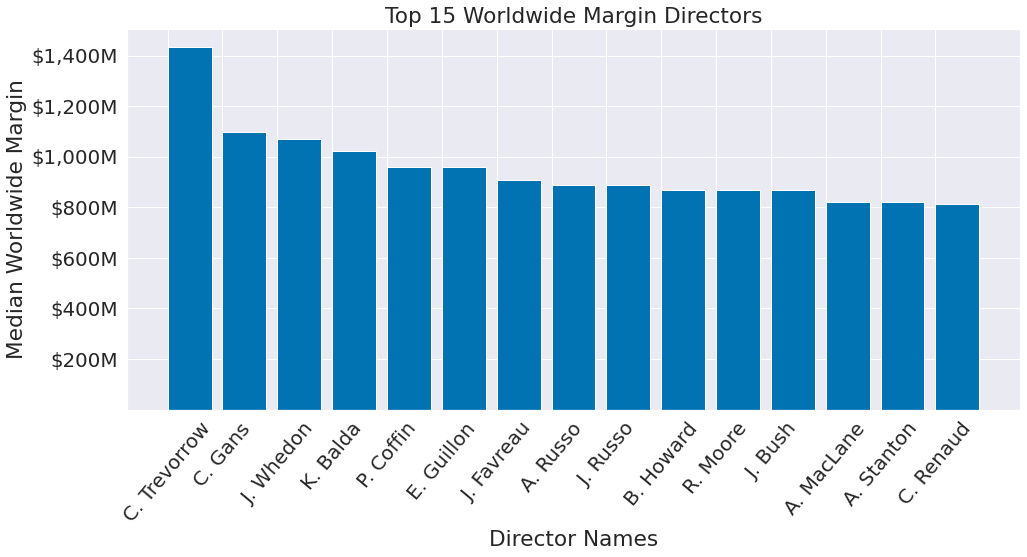

In [420]:
fig, ax = plt.subplots(figsize=(16, 7))

x = director_wwmargin_median['primary_name']
y = director_wwmargin_median['worldwide_margin']

_y_ticks = [(value * 10**8) for value in range(2,14+1,2)]
ax.set(
    title = "Top 15 Worldwide Margin Directors", 
    xlabel = "Director Names",
#    xticks = x,
    xticklabels = [f'{director[0]}. {director.split(" ")[-1]}' for director in x.tolist()],
    ylabel = "Median Worldwide Margin",
    yticks=_y_ticks,
    yticklabels = [f'${int(x/1000000):,}M' for x in _y_ticks]
)

ax.bar(x, y, align='edge')
plt.xticks(rotation=50)
plt.rc('font', size = 25)
"";

In [122]:
# CREATE A NEW DATAFRAME WITH REDUCED DATA FOR GRAPHS
market_focus_df = budgets_df.loc[
    (budgets_df['foreign_gross'] > 0) & (budgets_df['domestic_gross'] > 0),
    ['worldwide_gross','domestic_gross','foreign_gross']
]

,worldwide_gross,domestic_gross,foreign_gross
0,2776345279,760507625,2015837654
1,1045663875,241063875,804600000
2,149762350,42762350,107000000
3,1403013963,459005868,944008095
6,2048134200,678815482,1369318718
...,...,...,...
5672,3090593,1597486,1493107
5679,41656474,22764410,18892064
5685,2769782,1594798,1174984
5706,4678513,3221152,1457361


In [218]:
market_focus = {
    'worldwide': {
        'median': market_focus_df['worldwide_gross'].median(),
        'top_median': market_focus_df['worldwide_gross'][:50].median()
    },
    'domestic': {
        'median': market_focus_df['domestic_gross'].median(),
        'top_median': market_focus_df['domestic_gross'][:50].median()
    },
    'foreign': {
        'median': market_focus_df['foreign_gross'].median(),
        'top_median': market_focus_df['foreign_gross'][:50].median()
    }
};
market_focus2 = pd.DataFrame(market_focus)

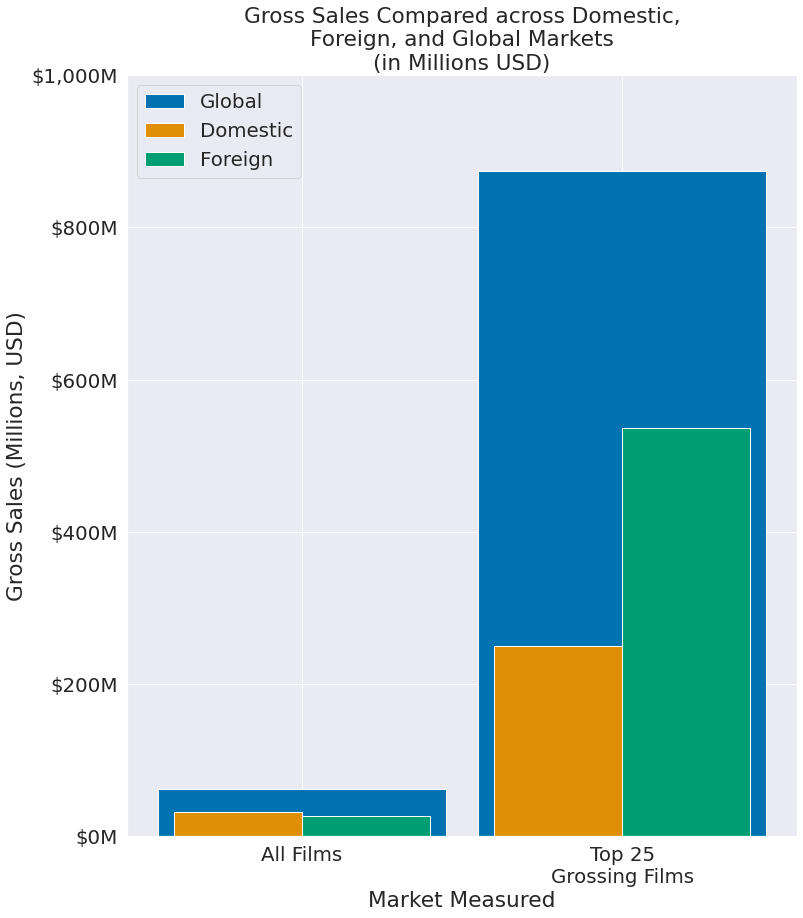

In [421]:
fig, ax = plt.subplots(figsize = (12,14))
sns.set_palette('colorblind')

x = ['All Films','Top 25\nGrossing Films']
_y_ticks = [(value * 10**8) for value in range(0,10+1,2)]

ax.bar(
    x=x,
    height=list(market_focus['worldwide'].values()),
    width=-0.9,
    align='center'
)
ax.bar(
    x=x,
    height=list(market_focus['domestic'].values()),
    width=-0.4,
    align='edge'
)
ax.bar(
    x=x,
    height=list(market_focus['foreign'].values()),
    width=0.4,
    align='edge'
)

ax.set(
    title="Gross Sales Compared across Domestic,\nForeign, and Global Markets\n(in Millions USD)",
    xlabel="Market Measured",
    ylabel="Gross Sales (Millions, USD)",
    yticks=_y_ticks,
    yticklabels = [f'${int(x/1000000):,}M' for x in _y_ticks]
)
ax.legend(['Global','Domestic','Foreign'])
plt.rc('font', size = 25)
# formatting y labels as millions of dollars US
'';

## Results

## Conclusions

## Next Step

- name matching
- no new avatar
- we looked at last 10 years so it disregards the first avatar and other big movies so might be worth to go back more
- get or generate a more complete dataset bc lots of mismatches and missing data such as worldwide gross listed as zero and movies with no ids

## Repository structure

## Thank you